CSCI 4120 Group 30

Hw 3

Seymone Gugneja

10/2/2021

In [1]:
# Homework Credit: https://github.com/VSerpak/DSE210x-Statistics-and-Probability-in-Data-Science-using-Python/tree/master/Week%209%20Regression%20and%20PCA
%pylab inline
# %pylab magic function is entered at the IPython prompt, it triggers the import of various modules within Matplotlib
from scipy import *
from numpy.linalg import norm
from math import sqrt,sin,cos
import pandas as pd
import numpy as np
from numpy import arange,array,ones,linalg

Populating the interactive namespace from numpy and matplotlib


In [2]:
def f(x, reg):
    return reg[0]+ x*reg[1]

In [3]:
# Homework: Regression to the Mean

### Excercises

It is now your turn to do regression on a dataset. Consider $1000$ datapoints with random variables $x$ and $y$ both sampled from a normal (gaussian) distribution:
$$ x,y \text{ ~ } \mathcal{N}(0,1)  $$

Notice that the graph below looks like a blob, with no clear relationship between  $x$ and $y$. This leads intuitively to the idea that $x$ and $y$ are independent from each other. In this particualr case (not always true) this intuition is correct, $x$ and $y$ are mathematically independent variables.

If we were to try to perform linear regression on this data (the <font style="color:red">red line</font>), we would find rather boring results:
$$ y = 0 + 0 \cdot x = 0 $$

This is due to the fact that $y$ has mean 0 and is independent of $x$. What do you think would happen if we did:
$$ y-x = w_0 + w_1 \cdot x $$

Is $y$ independent of $x$? Will the graph look like a blob? Will $y-x = 0 ?$ Lets find out!

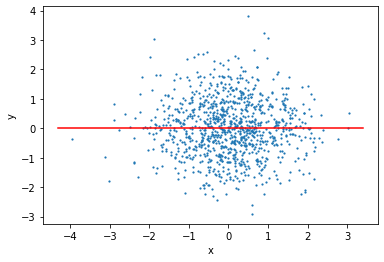

In [4]:
HW=pd.read_csv('data/gauss_R2.csv')

ax= HW.plot(kind='scatter',s=1.4,x="x",y="y");
x0,x1=xlim()
ax.plot([x0,x1],[0,0],'r');

## Exercise 1: Put $\;y-x\;$ in Dataframe

This first exercise's goal is to familarize you with the [pandas](http://pandas.pydata.org/pandas-docs/version/0.15.2/tutorials.html) package.

Your task is to make a new column on the pandas dataframe `HW` where each element of the new column equals to $y-x$. Write a function **y_minus_x** that will create the new column, make sure the column's name is "y-x" . Notice that the function DOES NOT return any output, this is because the `HW` dataframe will be edited "in-place".

<font  style="color:blue"> * **Code:** *</font>
```python
print y_minus_x(HW)
print HW.shape
print HW.columns
HW.head()
```

<font  style="color:magenta"> * **Output:** *</font>
```
None
(1000, 3)
Index([u'x', u'y', u'y-x'], dtype='object')
```
<img src="data/reg_mean_pic.png"  style="width: 220px;"/>

In [5]:
def y_minus_x(HW):
    # input: the HW's dataset
    # output: there is NO OUTPUT
    # the new column column should be called 'y-x'
    
    # Your code
    HW['y-x'] = HW['y'] - HW['x']

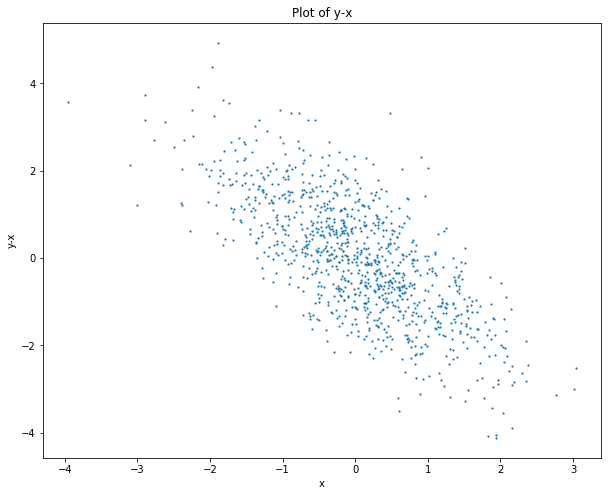

In [6]:
# Check Answer
HW=pd.read_csv('data/gauss_R2.csv')
assert y_minus_x(HW) == None 
assert HW.shape == (1000, 3)
assert all( HW.columns.values == array(['x', 'y', 'y-x']) )
assert sum(abs( array(HW["y-x"])[0:10] - \
               array([0.36236278,-2.37726552,-0.36501525,0.05449746,-0.27705517,1.80807383,-2.07001209,
                      -0.67536514,0.67519959,  0.97277652])   )) < 10**-5

# Create Graph
ax= HW.plot(kind='scatter',s=1.4,x="x",y="y-x",figsize=[10,8], title="Plot of y-x");

#
# AUTOGRADER TEST - DO NOT REMOVE
#


Notice in the graph that there is a clear negative relationship between $y-x$ and $x$. As you might have guessed, $y-x$ and $x$ are NOT independent. 

We can use linear regression to find the relationship between $y-x$ and $x$ but before we do that, we can derive this mathematicaly. Remember from before, we showed:
$$ y = 0 + 0 \cdot x $$

Now, we're doing linear regression to find:
$$ \;\;\;\;\;\;y-x = w_0 + w_1 \cdot x $$
$$ \iff y = w_0 + (1+w_1) \cdot x $$

Comparing the two eqations for $y$, you can deduce that $w_0=0$ and $w_1=-1$ . Now lets see how close our sampled data is to the true equation for the distribution!

$\;$
<font style="color:red">*Technical Note:*</font> The derivation is mathematically sound only because $y-x$ is also a gaussian random variable. The sum of two gaussians is a gaussian. Under the laws of linear regression this ensures both the regressors of $y$ and $y-x$ have zero expected error.

## Exercise 2: Simple Linear Regression

Write a function, **do_regression**, that performs linear regression to return 
$ \;
 {\bf w} = \begin{pmatrix}
 w_0\\
 w_1
 \end{pmatrix}
$
for the equation:

$$
\text{y-x}= w_0 + w_1 \cdot \text{x}
$$


<font  style="color:blue"> * **Code:** *</font>
```python
w = do_regression(HW)
print type(w)
print w.shape
```

<font  style="color:magenta"> * **Output:** *</font>
```
<type 'numpy.ndarray'>
(2,)
```

In [9]:
# modify this cell

def do_regression(HW):
    # input: the HW's dataset
    # output: a numpy array yielding w=(w0,w1) from linear regression
    
    # Your code
    # vstack merges a column containing only ones with x
    x = HW['x']
    # groupby grade, .value
    y = HW['y-x']
    # vstack merges a column containing only ones with x
    A = np.vstack([x, np.ones(len(x))]).T
    # least-squares solution to a linear matrix equation.
    # rcond: Cut-off ratio for small singular values of a. 
    # Singular values are set to zero if they are smaller than rcond times the largest singular value of a.
    w1, w0 = np.linalg.lstsq(A, y, rcond=None)[0]
    return np.array([w0,w1])

LINEAR REGRESSION EQUATION:
y-x = 0.02 + -1.01 x


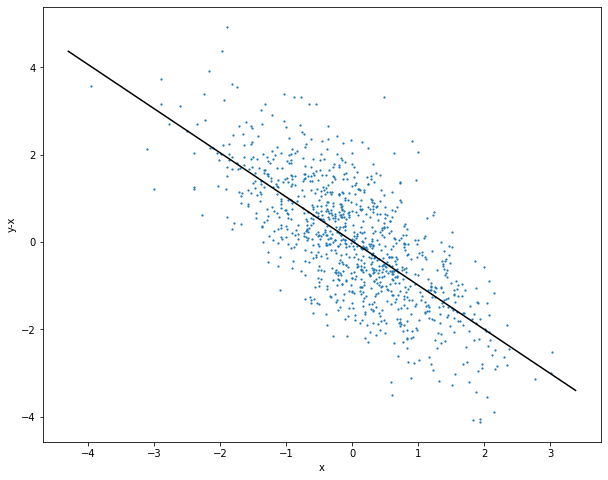

In [10]:
# Check Answer
w_hw = do_regression(HW)
assert str(type(w_hw)) == "<class 'numpy.ndarray'>"
assert w_hw.shape == (2,)
assert sum(abs(w_hw[0] - 0.02173387)) < 10**-5

# Plot Graph
print("LINEAR REGRESSION EQUATION:")
print("y-x = {:.2f} + {:.2f} x".format(w_hw[0],w_hw[1]))
ax= HW.plot(kind='scatter',s=1.4,x="x",y="y-x",figsize=[10,8]);
x0,x1=xlim()
ax.plot([x0,x1],[f(x0,w_hw),f(x1,w_hw)],'k');

#
# AUTOGRADER TEST - DO NOT REMOVE
#